#Information of Bees_ST20119000 

# Exploratory Analysis 

## Import Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
sns.set()

##Wurzburg 2017 dataset analysis per hour

### Import 2017 data files 


In [2]:
flow = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dissertation/Kaggle/flow_2017.csv')
humidity = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dissertation/Kaggle/humidity_2017.csv')
temperature = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dissertation/Kaggle/temperature_2017.csv')
weight = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dissertation/Kaggle/weight_2017.csv')

df_2017 = pd.concat([flow, humidity, temperature, weight], axis=1, join='inner').sort_index()

###Flow
###### Flow values can be either positive or negative. A positive score indicates that more bees are entering the hive, while a negative number suggests that more bees are departing the hive.



In [3]:
flow.info()
flow.describe()
flow.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048220 entries, 0 to 1048219
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   timestamp  1048220 non-null  object
 1   flow       1048220 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 16.0+ MB


,timestamp,flow
0,2017-01-01 05:15:00,0
1,2017-01-01 05:16:00,0
2,2017-01-01 05:17:00,0
3,2017-01-01 05:18:00,0
4,2017-01-01 05:19:00,0


In [4]:
flow_times = pd.to_datetime(flow.timestamp)
flow_TS = pd.Series(data=np.array(flow.flow), index=pd.DatetimeIndex(flow_times), dtype="float")

In [5]:
#resample dataframe to hourly
flow_TSH = flow_TS.resample("H").sum()

In [6]:
#Check for any Nan values
flow_TSH[flow_TSH.isnull()]

Series([], Freq: H, dtype: float64)

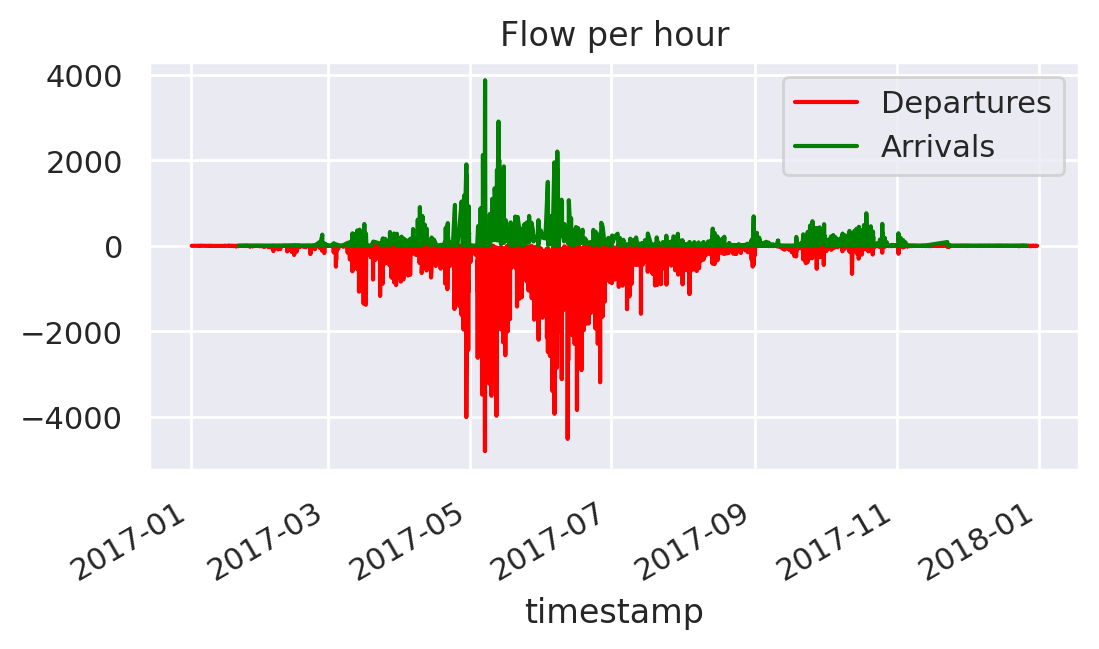

In [7]:
# Flow per hour
ax = plt.figure(figsize=(6,3), dpi=200).add_subplot(111)
flow_TSH[flow_TSH < 0].plot(ax=ax, title="Flow per hour", color="red", label = "Departures")
flow_TSH[flow_TSH > 0].plot(ax=ax, color="green", label = "Arrivals")
leg = ax.legend();

In [8]:
#Identify departures and arrivals
flow_departures = flow[flow.flow < 0]
flow_arrivals = flow[flow.flow > 0]
list_of_flows = [flow_departures, flow_arrivals]

#set departures with index within the dataframe
flow_departures['timestamp'] = pd.to_datetime(flow_departures['timestamp'])
flow_departures.index = flow_departures['timestamp']

#match timestamp with arrivals index in the dataframe
flow_arrivals['timestamp'] = pd.to_datetime(flow_arrivals['timestamp'])
flow_arrivals.index = flow_arrivals['timestamp']

#resample the flow dataframe to monthly
flow_departures = flow_departures.resample("M").sum()
flow_arrivals = flow_arrivals.resample("M").sum()
flow_departures['flow'] = flow_departures['flow'].abs()

#print total number of departures and arrivals
print(flow_arrivals)
print(flow_departures)

               flow
timestamp          
2017-01-31       98
2017-02-28    26512
2017-03-31   221871
2017-04-30   514921
2017-05-31  1765814
2017-06-30  2153732
2017-07-31  1101949
2017-08-31   634190
2017-09-30   341925
2017-10-31   257943
2017-11-30    22307
2017-12-31      172
               flow
timestamp          
2017-01-31     1025
2017-02-28    31317
2017-03-31   261322
2017-04-30   565356
2017-05-31  1915076
2017-06-30  2454586
2017-07-31  1234736
2017-08-31   679539
2017-09-30   351614
2017-10-31   244962
2017-11-30    22234
2017-12-31      865


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


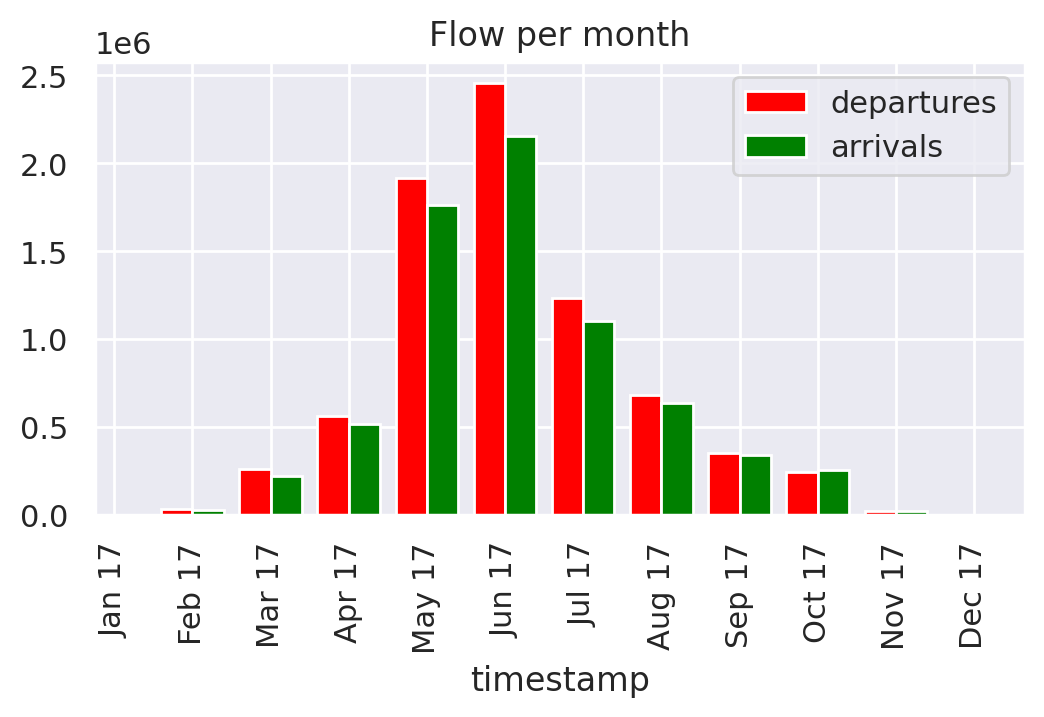

In [9]:
#flow per month
width = 0.4
ax = plt.figure(figsize=(6,3), dpi=200).add_subplot(111)
flow_departures.plot(ax=ax, kind="bar",  color = "red", label = "departures", title = "Flow per month", width=width, position=1)
flow_arrivals.plot(ax=ax,kind="bar", color = "green", label = "arrivals", width=width, position=0)
ax.legend(["departures", "arrivals"])
ax.set_xticklabels(['Jan 17', 'Feb 17', 'Mar 17', 'Apr 17', 'May 17', 'Jun 17', 'Jul 17', 'Aug 17', 'Sep 17', 'Oct 17', 'Nov 17', 'Dec 17',
                   'Jan 18', 'Feb 18', 'Mar 18', 'Apr 18', 'May 18', 'Jun 18', 'Jul 18', 'Aug 18', 'Sep 18', 'Oct 18', 'Nov 18', 'Dec 18',
                   'Jan 19', 'Feb 19', 'Mar 19', 'Apr 19', 'May 19', 'Jun 19', 'Jul 19', 'Aug 19', 'Sep 19', 'Oct 19', 'Nov 19', 'Dec 19'], rotation=90);

Surprisingly, most of the time, departures outnumber arrivals. That makes logical; some bees may die while leaving the hive or may not be able to return safely to it. But what about October and November? Are there more arrivals than departures? we can see that there is arrivals from 31st october to 30th november

In [10]:
print(flow_arrivals[flow_arrivals.index == '2017-10-31'] > flow_departures[flow_departures.index == '2017-10-31'])
print(flow_arrivals[flow_arrivals.index == '2017-11-30'] > flow_departures[flow_departures.index == '2017-11-30'])

            flow
timestamp       
2017-10-31  True
            flow
timestamp       
2017-11-30  True


###Humidity
###### Humidity levels are represented as a percentage. This implies that they should be in the range [0,100].



In [11]:
humidity.info()
humidity.describe()
humidity.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8737 entries, 0 to 8736
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  8737 non-null   object 
 1   humidity   8737 non-null   float64
dtypes: float64(1), object(1)
memory usage: 136.6+ KB


,timestamp,humidity
0,2017-01-01 05:00:00,92.406667
1,2017-01-01 06:00:00,92.270000
2,2017-01-01 07:00:00,92.575000
3,2017-01-01 08:00:00,92.840000
4,2017-01-01 09:00:00,93.640000


In [12]:
#Set timestamp as the index and humidity as its value in a time series
humidity_times = pd.to_datetime(humidity.timestamp)
humidity_TS = pd.Series(data=np.array(humidity.humidity), index=pd.DatetimeIndex(humidity_times), dtype="float")

In [13]:
#resample dataframe to hourly
humidity_TSH = humidity_TS.resample("H").sum()
print(humidity_TSH)

timestamp
2017-01-01 05:00:00    92.406667
2017-01-01 06:00:00    92.270000
2017-01-01 07:00:00    92.575000
2017-01-01 08:00:00    92.840000
2017-01-01 09:00:00    93.640000
                         ...    
2017-12-31 01:00:00    90.255000
2017-12-31 02:00:00    91.685000
2017-12-31 03:00:00    92.323333
2017-12-31 04:00:00    92.675000
2017-12-31 05:00:00    91.900000
Freq: H, Length: 8737, dtype: float64


In [14]:
#Check for any Nan values
humidity_TSH[humidity_TSH.isnull()]

Series([], Freq: H, dtype: float64)

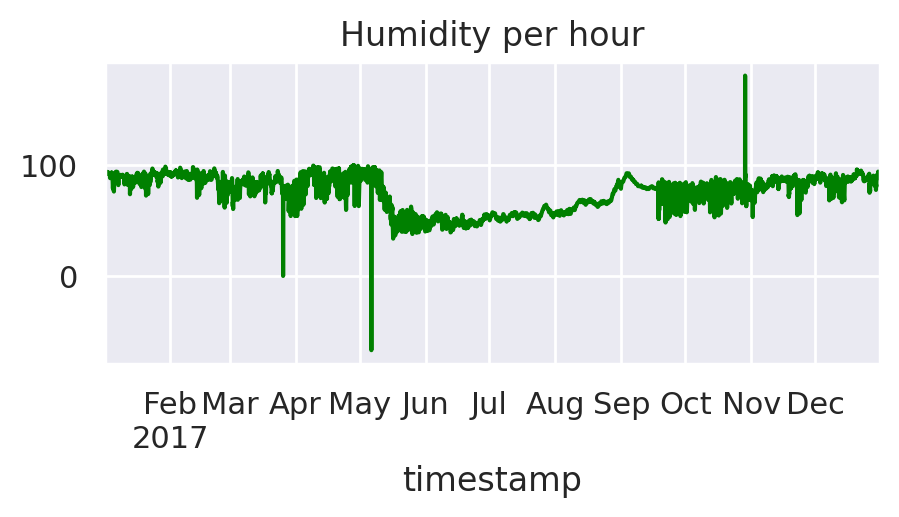

In [15]:
#humidity per hour
ax = plt.figure(figsize=(5,2), dpi=200).add_subplot(111)
humidity_TSH.plot(ax=ax, title="Humidity per hour", color="green")

In [16]:
#It is worth noting that in May, the humidity level is less than 0. It might be due to a sensor fault or metric mistake, thus a human adjustment is performed by giving values of time near the time it occurred.

humidity_TSH[humidity_TSH < 0]

timestamp
2017-05-06 12:00:00   -50.233333
2017-05-06 13:00:00   -66.710000
Freq: H, dtype: float64

In [17]:
#only 2 values were recorded below 0 
humidity_TSH['2017-05-06 12:00:00'] = humidity_TSH['2017-05-06 11:00:00']
humidity_TSH['2017-05-06 13:00:00'] = humidity_TSH['2017-05-06 15:00:00']

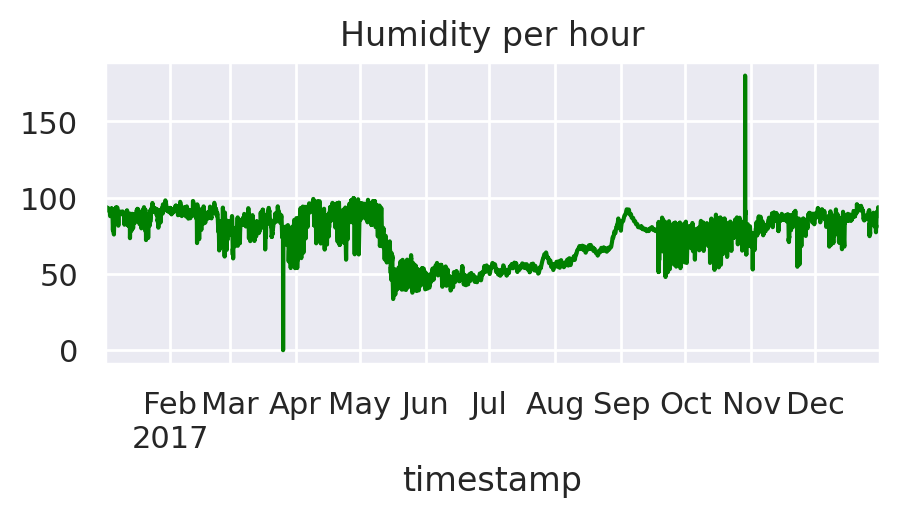

In [18]:
#humidity per hour after fix
ax = plt.figure(figsize=(5,2), dpi=200).add_subplot(111)
humidity_TSH.plot(ax=ax, title="Humidity per hour", color="green")

###Temperature
###### Let's have a look at the temperature dataset. The values are known to be stated in Cº.



In [19]:
temperature.info()
temperature.describe()
temperature.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401869 entries, 0 to 401868
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   timestamp    401869 non-null  object 
 1   temperature  401866 non-null  float64
dtypes: float64(1), object(1)
memory usage: 6.1+ MB


,timestamp,temperature
0,2017-01-01 05:00:00,-1.911244
1,2017-01-01 06:00:00,-1.866717
2,2017-01-01 07:00:00,-2.077833
3,2017-01-01 08:00:00,-2.327167
4,2017-01-01 09:00:00,-2.791233


In [20]:
#Set timestamp as the index and temperature as its value in a time series
temperature_times = pd.to_datetime(temperature.timestamp)
temperature_TS = pd.Series(data=np.array(temperature.temperature), index=pd.DatetimeIndex(temperature_times), dtype="float")

In [21]:
#resample dataframe to hourly 
#sum if hourly, mean if every 5 min
temperature_TSH = temperature_TS.resample("H").sum()

In [22]:
#Check for any Nan values
temperature_TSH[temperature_TSH.isnull()]

Series([], Freq: H, dtype: float64)

In [23]:
#Manual correction for '2017-03-26 02:00:00', using the data of one hour before
#temperature_TSH['2017-03-26 02:00:00'] = temperature_TSH['2017-03-26 01:00:00']
#temperature_TSH[temperature_TSH.isnull()]

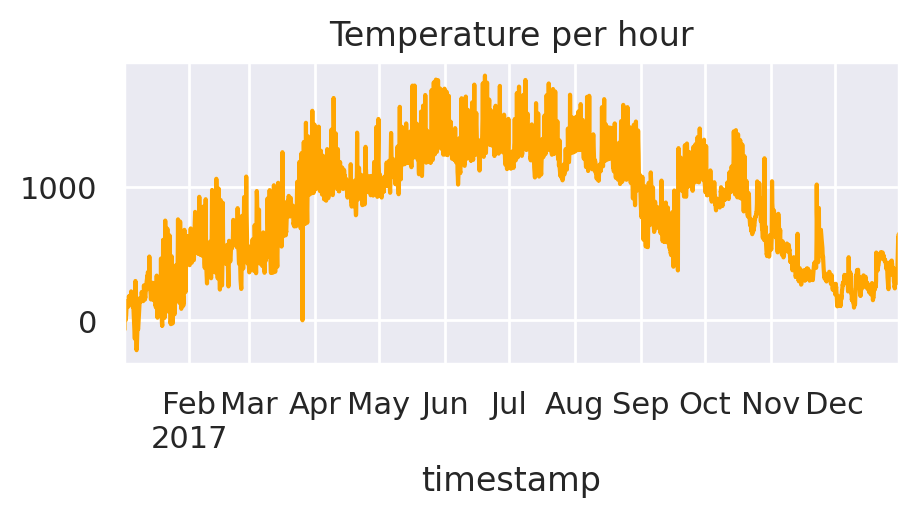

In [24]:
#temperature per hour
ax = plt.figure(figsize=(5,2), dpi=200).add_subplot(111)
temperature_TSH.plot(ax=ax, title="Temperature per hour", color="orange")

In [25]:
#There are a total of 13 temperature sensors. So, in order to distinguish them, we must tag them. 
#The sequence of the data sets indicates that we have sensor1 data followed by sensor 2 data, and so on. So, we may tag each row with the correct tag, and when we see that the date has reduced (the sensor data is ended, and it starts with the next sensor data), we raise the tag.
#First, the data contains metrics every few minutes, sometimes every 5 minutes.

temperature_Hour = temperature[temperature['timestamp'].astype(str).str.match("[0-9]{4}-(0[1-9]|1[0-2])-(0[1-9]|[1-2][0-9]|3[0-1]) (2[0-3]|[01][0-9]):00:00")]

In [26]:
#after matching timestamp with regex we can now tag by sensor 1 to 13
#Sensor tagging
sensor_tag_list = []
prev_timestamp = temperature_Hour.iloc[0].timestamp
tag_number = 1

for row in temperature_Hour.itertuples():
    current = row.timestamp
    if current < prev_timestamp:
        tag_number+=1
        
    sensor_tag_list.append(tag_number)
    prev_timestamp = current  

print(len(sensor_tag_list))

113578


In [27]:
#After taging each sensor we can add the sensor tag as a column
temperature_Hour['Sensor'] = sensor_tag_list
temperature_Hour

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,timestamp,temperature,Sensor
0,2017-01-01 05:00:00,-1.911244,1
1,2017-01-01 06:00:00,-1.866717,1
2,2017-01-01 07:00:00,-2.077833,1
3,2017-01-01 08:00:00,-2.327167,1
4,2017-01-01 09:00:00,-2.791233,1
...,...,...,...
401818,2017-12-31 01:00:00,11.486000,13
401830,2017-12-31 02:00:00,10.988000,13
401842,2017-12-31 03:00:00,11.002000,13
401854,2017-12-31 04:00:00,11.914000,13


[Text(0, 0, 'timestamp')]

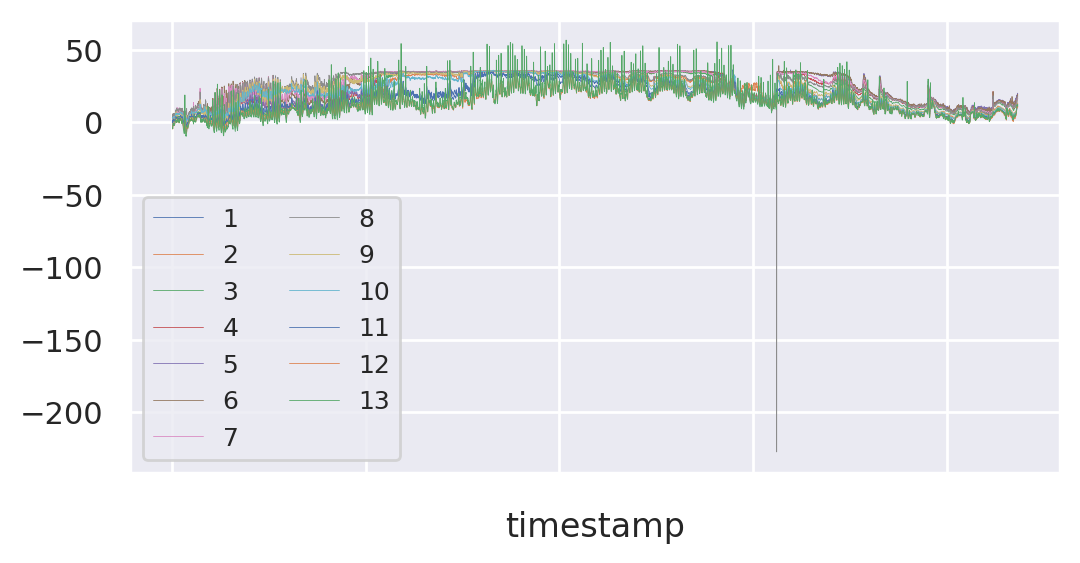

In [28]:
#temperature of 13 sensors
ax = plt.figure(figsize=(6,3), dpi=200).add_subplot(111)
temperature_Hour.pivot_table(index='timestamp',columns='Sensor',values='temperature').plot(ax=ax, rot=45, linewidth=0.3)
ax.legend(loc='best',fancybox=True, ncol=2, fontsize=9)
ax.set_xticklabels(['timestamp'])

In [29]:
temperature_Hour[temperature_Hour.temperature < -50].index;

(-15.0, 55.0)

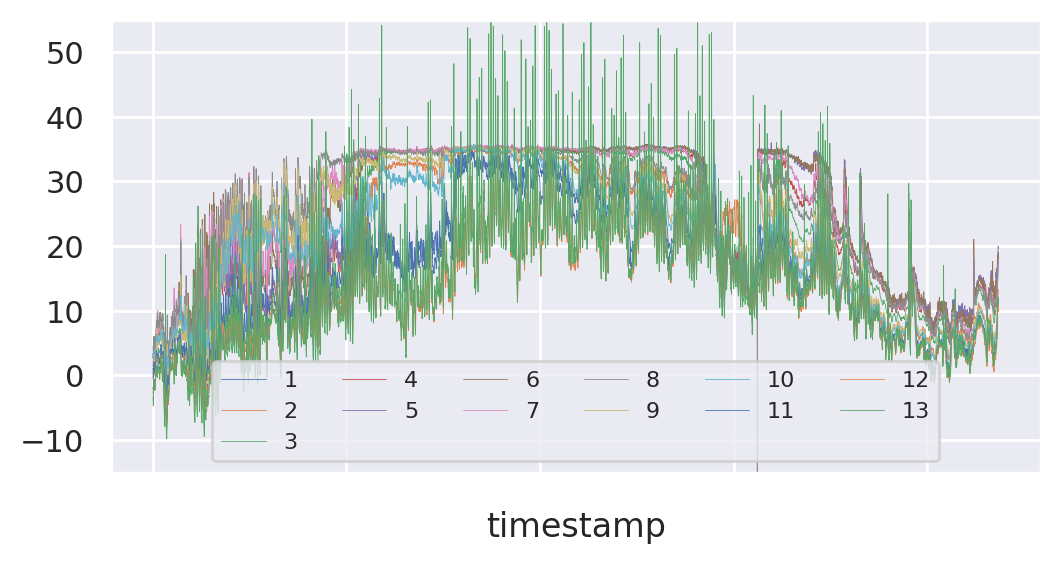

In [30]:
#temperature of 13 sensors
ax = plt.figure(figsize=(6,3), dpi=200).add_subplot(111)
temperature_Hour.pivot_table(index='timestamp',columns='Sensor',values='temperature').plot(ax=ax, rot=45, linewidth=0.3)
ax.legend(loc='lower center',fancybox=True, ncol=6, fontsize=8)
ax.set_xticklabels(['timestamp'])
ax.set_ylim([-15,55])

###Weight
###### Weight is measured in kilogrammes (KG). This means that the values for this analysis are expected to be positive.



In [31]:
weight.info()
weight.describe()
weight.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524110 entries, 0 to 524109
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   timestamp  524110 non-null  object 
 1   weight     524110 non-null  float64
dtypes: float64(1), object(1)
memory usage: 8.0+ MB


,timestamp,weight
0,2017-01-01 05:15:00,52.6974
1,2017-01-01 05:16:00,52.6974
2,2017-01-01 05:17:00,52.6974
3,2017-01-01 05:18:00,52.6974
4,2017-01-01 05:19:00,52.6973


In [32]:
#Set timestamp as the index and weight as its value in a time series
weight_times = pd.to_datetime(weight.timestamp)
weight_TS = pd.Series(data=np.array(weight.weight), index=pd.DatetimeIndex(weight_times), dtype="float")

In [33]:
#resample dataframe to hourly 
#sum if hourly, mean if in minutes
weight_TSH = temperature_TS.resample("H").mean()

In [34]:
#Check for any Nan values
weight_TSH[weight_TSH.isnull()]

timestamp
2017-03-26 02:00:00   NaN
Freq: H, dtype: float64

In [35]:
#Manual correction for '2017-03-26 02:00:00', using the data of one hour before
weight_TSH['2017-03-26 02:00:00'] = weight_TSH['2017-03-26 01:00:00']
weight_TSH[weight_TSH.isnull()]

Series([], Freq: H, dtype: float64)

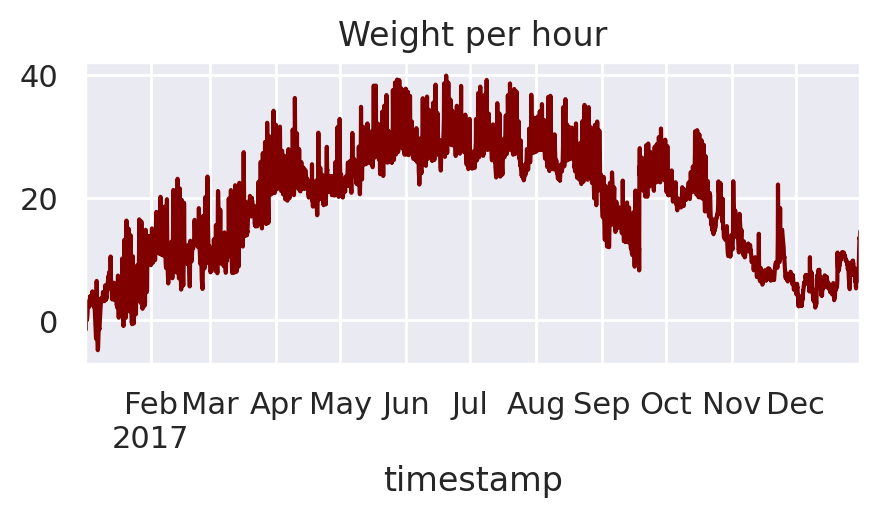

In [36]:
#weight per hour
ax = plt.figure(figsize=(5,2), dpi=200).add_subplot(111)
weight_TSH.plot(ax=ax, title="Weight per hour", color="maroon")

##Overview & Identifications 2017


### Humidity, Temperature, and Weight Overview
When you think about it, these three things appear to be inextricably linked. They are also greatly influenced by the time of year and season.Given that the data is from Germany and that summer is in the middle of the year, with the coldest months being December and January.



In [37]:
#Resample data to monthly
weight_TSM = weight_TS.resample("M").mean()
humidity_TSM = humidity_TS.resample("M").mean()
temperature_TSM = temperature_TS.resample("M").mean()

We can plainly see here that the highest temperatures, but the lowest humidity, occur in May and June. Higher temperatures cause weight gain, which causes bees to make more honey. Honey production equals more honey and weight begins to increase around June, just as flowers begin to bloom.

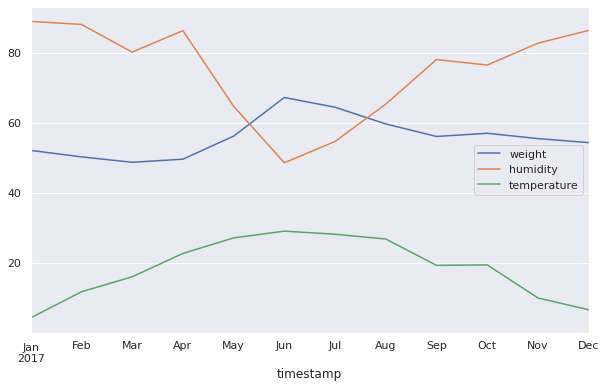

In [38]:
#data overview
TempHumWei = pd.DataFrame({'weight' : weight_TSM, 'humidity': humidity_TSM, 'temperature': temperature_TSM})
TempHumWei.plot(figsize=(10,6))

### Identification of the Brooding Period
Various studies have shown that either high or low humidity levels impact the health of brood and adult bees, either directly or indirectly. For example, at levels below 50% relative humidity in brood cells, no eggs hatch (Doull 1976) Raising the humidity from 68 to 87 percent, for example, raises the proportion of brood mummification produced by the chalkbrood 8 percent more."

"During the brood raising stage, the median humidity level in the nest of a healthy vigorous colony is between 50 and 60 percent. It is seldom observed to be less than 40% and more than 80% "


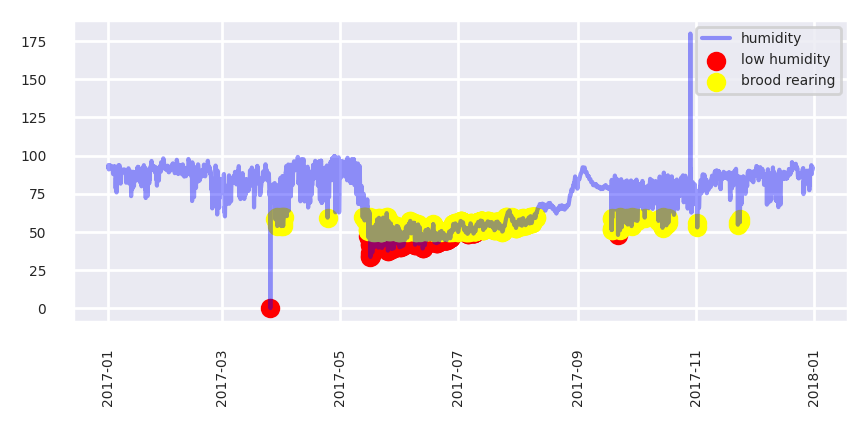

In [39]:
#brood identification
below_50 = humidity_TSH[humidity_TSH < 50]
humidity_brood = humidity_TSH[(humidity_TSH > 50) & (humidity_TSH < 60)]

ax = plt.figure(figsize=(5,2), dpi=200).add_subplot(111)
ax.plot(humidity_TSH.index, humidity_TSH.values,color="blue", alpha=0.4)
ax.scatter(below_50.index, below_50.values, color="red")
ax.scatter(humidity_brood.index, humidity_brood.values, color="yellow")

plt.xticks(rotation=90)
ax.tick_params(axis='both', which='major', labelsize=5)
ax.legend(["humidity", "low humidity", "brood rearing"],  prop={'size':5})

We can see that there is a high chance that health of the bees can decrease in April.

"Increasing day length and pollen availability soon insures that birth rate exceeds death rate and the colony population grows rapidly in April, May and June. The adult population remains high but drops during July and August." https://web.archive.org/web/20180731065907/http://articles.extension.org/pages/21747/seasonality-of-brood-and-adult-populations-basic-bee-biology-for-beekeepers

Connection with temperature
"the optimal temperature range for brood rearing is 30-35 °C." https://hal.archives-ouvertes.fr/hal-00891337/document

In [40]:
temperature_brood = temperature_TSH.filter(items=humidity_brood.index)
temperature_brood.tail()

timestamp
2017-11-01 16:00:00     979.542000
2017-11-22 15:00:00    1018.764667
2017-11-22 16:00:00     872.870667
2017-11-23 15:00:00     842.867000
2017-11-23 16:00:00     710.327667
dtype: float64

(array([412013, 412752, 413424, 414168, 414888, 415632, 416352, 417096,
        417840, 418560, 419304, 420024, 420749]),
 <a list of 13 Text major ticklabel objects>)

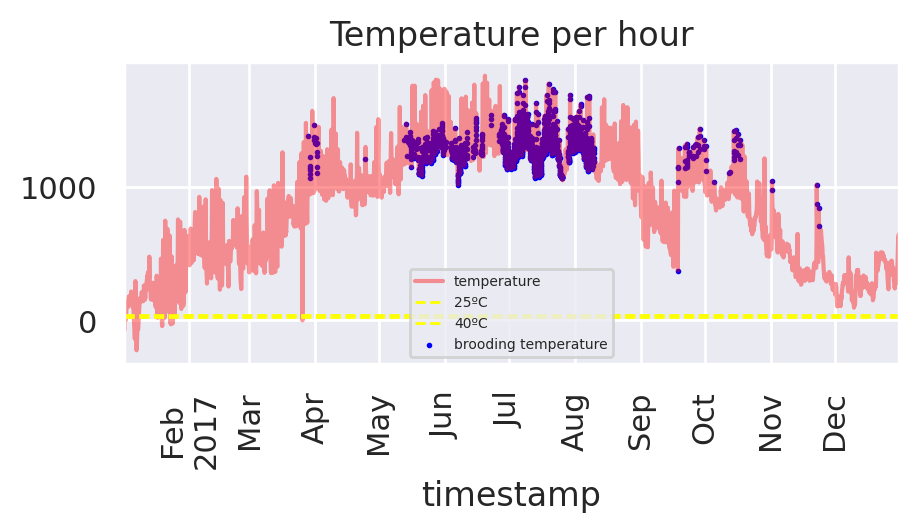

In [41]:
#temperature per hour
ax = plt.figure(figsize=(5,2), dpi=200).add_subplot(111)
temperature_TSH.plot(ax=ax, title="Temperature per hour", color="red", alpha= 0.4)
ax.scatter(temperature_brood.index, temperature_brood.values, color="blue", s=1, alpha=1)

#According to recent research temperature should be around 30ºC and 35ºC, let's take a +-5ºC tolerance
ax.axhline(y=25, color='yellow', linestyle='--', linewidth=1)
ax.axhline(y=40, color='yellow', linestyle='--', linewidth=1)
ax.legend(["temperature", "25ºC", "40ºC", "brooding temperature"],  prop={'size':5})
plt.xticks(rotation=90)

## Schwartau and Wurzburg hive analysis

###Schwartau per day

#### Import data files 


In [42]:
flow_sch = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dissertation/Kaggle/flow_schwartau.csv')
humidity_sch = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dissertation/Kaggle/humidity_schwartau.csv')
temperature_sch = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dissertation/Kaggle/temperature_schwartau.csv')
weight_sch = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dissertation/Kaggle/weight_schwartau.csv')

df_sch = pd.concat([flow_sch, humidity_sch, temperature_sch, weight_sch], axis=1, join='inner').sort_index()

#### Function for cleaning up csv files and arranging them to be per day while remaining consistent.

In [43]:
#Datasets file path
flow_sch = '/content/drive/MyDrive/Colab Notebooks/Dissertation/Kaggle/flow_schwartau.csv'
humidity_sch = '/content/drive/MyDrive/Colab Notebooks/Dissertation/Kaggle/humidity_schwartau.csv'
temperature_sch = '/content/drive/MyDrive/Colab Notebooks/Dissertation/Kaggle/temperature_schwartau.csv'
weight_sch = '/content/drive/MyDrive/Colab Notebooks/Dissertation/Kaggle/weight_schwartau.csv'

#The DataPerDay() method accepts the files as an argument and organises the data by day.
#sum of flow and mean temperature, weight and humidity are grouped 

def DataPerDay(datafile):
    name = str(datafile)
    datafile = pd.read_csv(datafile, sep=',', decimal=".")
    datafile['timestamp'] = pd.to_datetime(datafile['timestamp'])
    datafile.sort_values(by="timestamp")  #sort values by date
    datafile.set_index('timestamp', inplace=True) #date as index
    #print(name)
    #if file contains flow then group and sum it otherwise group and mean the rest of files and if Nan is found fill value with data from previous day
    if "flow" in name: 
        datafile = datafile.groupby(pd.Grouper(freq='D')).sum() 
        datafile.ffill()
    else: 
        datafile = datafile.groupby(pd.Grouper(freq='D')).mean() 
        datafile.ffill()
    return datafile 

#calling DataPerDay function on the input files
flow_sch = DataPerDay(flow_sch)
temperature_sch = DataPerDay(temperature_sch)
weight_sch = DataPerDay(weight_sch)
humidity_sch = DataPerDay(humidity_sch)


#### Bee flow
During the summer, the netflow is positive. In the other seasons, the inflow appears to approach the outflow, therefore the netflow is close to zero.

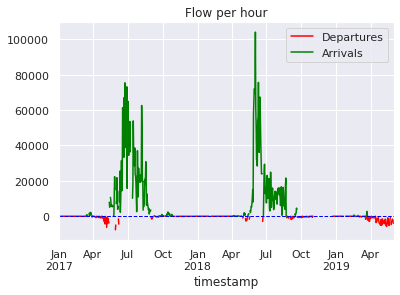

In [44]:
#flow per hour
ax = flow_sch[flow_sch < 0].plot(title="Flow per hour", color="red")
flow_sch[flow_sch > 0].plot(ax=ax, color="green")
ax.legend(["Departures", "Arrivals"])

ax.axhline(y=0, color='blue', linestyle='--', linewidth=1)

#### Hive Humidity
Humidity levels between 50% and 60% are ideal for breeding. It is clear from the graph that the circumstances were ideal in the summer of 2019.

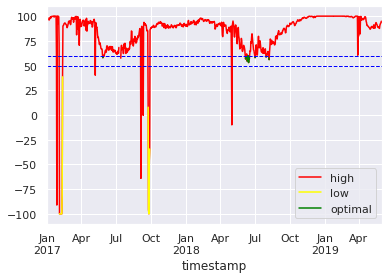

In [45]:
#seperate low and optimal data
low_humid = humidity_sch[humidity_sch < 50]
optimal_humid = humidity_sch[(humidity_sch > 50) & (humidity_sch < 60)]

#plot all, low and optimal data
ax1=humidity_sch.plot(color="red")
low_humid.plot(ax=ax1, color="yellow")
optimal_humid.plot(ax=ax1, color="green")
ax1.legend(["high","low","optimal"])

#mark optimal border in graph
ax1.axhline(y=50, color='blue', linestyle='--', linewidth=1)
ax1.axhline(y=60, color='blue', linestyle='--', linewidth=1)

#### Hive Temperature
The ideal temperature for breeding is between 30 and 35 degrees. The graph shows that the circumstances were best during the summers of 2017, 2018, and 2019.

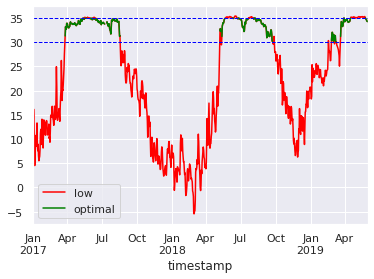

In [46]:
#seperate optimal data
optimal_temp = temperature_sch[(temperature_sch > 30) & (temperature_sch < 35)]

#plot all and optimal data
ax2=temperature_sch.plot(color="red")
optimal_temp.plot(ax=ax2, color="green")
ax2.legend(["low","optimal"])

#mark optimal border in graph
ax2.axhline(y=30, color='blue', linestyle='--', linewidth=1)
ax2.axhline(y=35, color='blue', linestyle='--', linewidth=1)

#### Hive Weight
Weight measurements appear to be incorrect in May, June and July 2018 as they approach 0. Overall, the weight appears to have decreased. The weight at the end of summer 2017 was more than the weight in 2018. This might indicate a lower honey resource, which might contribute to an increase in winter mortality.

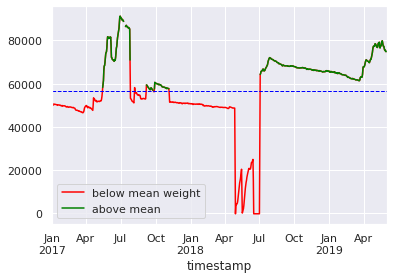

In [47]:
#seperate above mean
above_mean = weight_sch[weight_sch > weight_sch["weight"].mean()]

#plot all and above mean data
ax3 = weight_sch.plot(color="red")
above_mean.plot(ax=ax3, color="green")
ax3.legend(["below mean weight","above mean"])

#outline mean
ax3.axhline(y=weight_sch["weight"].mean(), color='blue', linestyle='--', linewidth=1)

###Wurzburg per day

#### Import data files 


In [48]:
flow_wur = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dissertation/Kaggle/flow_wurzburg.csv')
humidity_wur = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dissertation/Kaggle/humidity_wurzburg.csv')
temperature_wur = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dissertation/Kaggle/temperature_wurzburg.csv')
weight_wur = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dissertation/Kaggle/weight_wurzburg.csv')

df_wur = pd.concat([flow_wur, humidity_wur, temperature_wur, weight_wur], axis=1, join='inner').sort_index()

#### Function for cleaning up csv files and arranging them to be per day while remaining consistent.

In [49]:
#Dataset file path
flow_wur = '/content/drive/MyDrive/Colab Notebooks/Dissertation/Kaggle/flow_wurzburg.csv'
humidity_wur = '/content/drive/MyDrive/Colab Notebooks/Dissertation/Kaggle/humidity_wurzburg.csv'
temperature_wur = '/content/drive/MyDrive/Colab Notebooks/Dissertation/Kaggle/temperature_wurzburg.csv'
weight_wur = '/content/drive/MyDrive/Colab Notebooks/Dissertation/Kaggle/weight_wurzburg.csv'

#The DataPerDay() method accepts the files as an argument and organises the data by day.
#sum of flow and mean temperature, weight and humidity are grouped

def DataPerDay(datafile):
    name = str(datafile)
    datafile = pd.read_csv(datafile, sep=',', decimal=".")
    datafile['timestamp'] = pd.to_datetime(datafile['timestamp'])
    datafile.sort_values(by="timestamp")  #sort values by date
    datafile.set_index('timestamp', inplace=True) #date as index
    #print(name)
    #if file contains flow then group and sum it otherwise group and mean the rest of files and if Nan is found fill value with data from previous day
    if "flow" in name: 
        datafile = datafile.groupby(pd.Grouper(freq='D')).sum() 
        datafile.ffill()
    else: 
        datafile = datafile.groupby(pd.Grouper(freq='D')).mean() 
        datafile.ffill()
    return datafile 

#calling DataPerDay function on the input files
flow_wur = DataPerDay(flow_wur)
temperature_wur = DataPerDay(temperature_wur)
weight_wur = DataPerDay(weight_wur)
humidity_wur = DataPerDay(humidity_wur)


#### Bee flow
During the summer, the netflow is negative. In the other seasons, the inflow appears to be in the negative meaning either the hive collapsed or flow meter is faulty

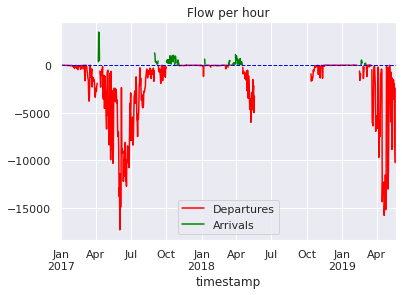

In [50]:
#flow per hour
ax = flow_wur[flow_wur < 0].plot(title="Flow per hour", color="red")
flow_wur[flow_wur > 0].plot(ax=ax, color="green")
ax.legend(["Departures", "Arrivals"])

ax.axhline(y=0, color='blue', linestyle='--', linewidth=1)

#### Hive Humidity
Humidity levels between 50% and 60% are ideal for breeding. It is clear from the graph that the circumstances were ideal in the summer of 2017.

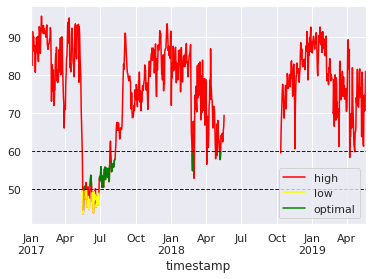

In [51]:
#seperate low and optimal data
low_humid = humidity_wur[humidity_wur < 50]
optimal_humid = humidity_wur[(humidity_wur > 50) & (humidity_wur < 60)]

#plot all, low and optimal data
ax1=humidity_wur.plot(color="red")
low_humid.plot(ax=ax1, color="yellow")
optimal_humid.plot(ax=ax1, color="green")
ax1.legend(["high","low","optimal"])

#mark optimal border in graph
ax1.axhline(y=50, color='blue', linestyle='--', linewidth=1)
ax1.axhline(y=60, color='blue', linestyle='--', linewidth=1)

#### Hive Temperature
The ideal temperature for breeding is between 30 and 35 degrees. The graph shows that the circumstances were ideal in summer 2017 however, the temperature appears to have been lower than the optimal levels compared to schwartau

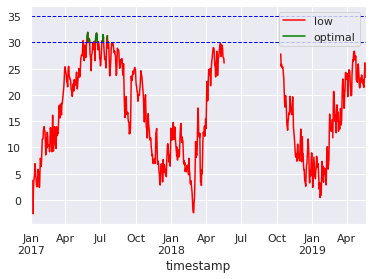

In [52]:
#seperate optimal data
optimal_temp = temperature_wur[(temperature_wur > 30) & (temperature_wur < 35)]

#plot all and optimal data
ax2=temperature_wur.plot(color="red")
optimal_temp.plot(ax=ax2, color="green")
ax2.legend(["low","optimal"])

#outline optimal boarder in graph
ax2.axhline(y=30, color='blue', linestyle='--', linewidth=1)
ax2.axhline(y=35, color='blue', linestyle='--', linewidth=1)

#### Hive Weight
Weight measurements appear to be missing for may til october 2018, this could mean the sensor failed to read any data or an error occurred . Overall, the weight appears to have decreased. The weight at the end of summer 2017 was more than the weight in 2018 and 2019. This may indicate a lower honey resource, which might contribute to an increase in winter mortality.

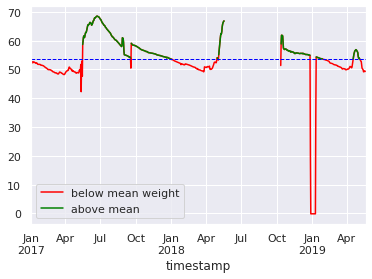

In [53]:
#seperate above mean
above_mean = weight_wur[weight_wur > weight_wur["weight"].mean()]

#plot all and above mean data
ax3 = weight_wur.plot(color="red")
above_mean.plot(ax=ax3, color="green")
ax3.legend(["below mean weight","above mean"])

#outline mean
ax3.axhline(y=weight_wur["weight"].mean(), color='blue', linestyle='--', linewidth=1)

## Correlation between parameters
this section will look into the correlation between parameters on a heatmap matrix diagram.

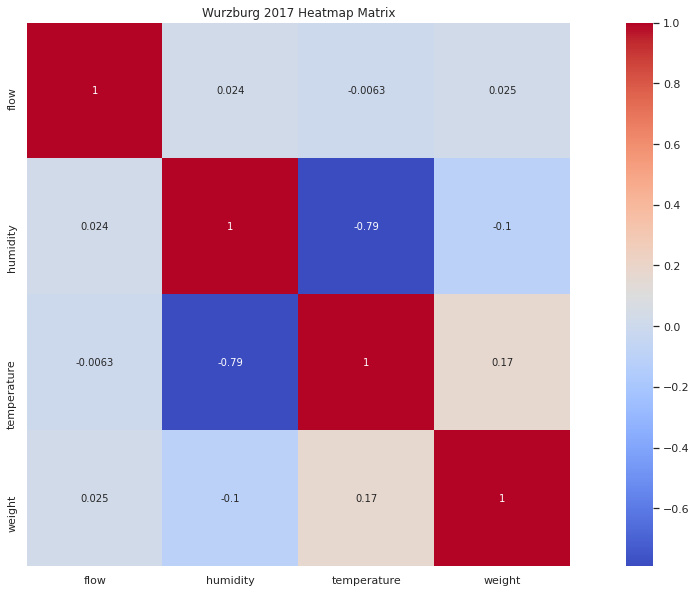

In [54]:
#shows correlation matrix and gets rid of the columns that are not suited for the correlation
corr_matrix = df_2017.corr(method='pearson') 
plt.figure(figsize=(20,10))
plt.title("Wurzburg 2017 Heatmap Matrix")
sns.heatmap(corr_matrix,vmax=1,square=True,annot=True,cmap='coolwarm')

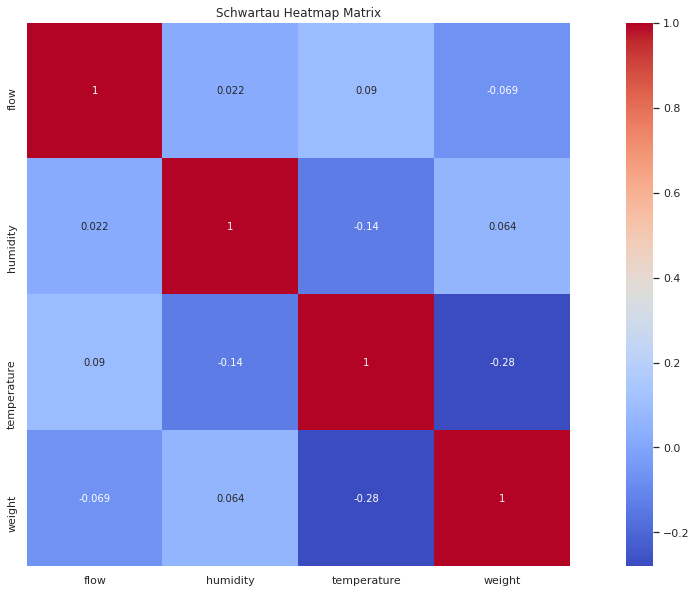

In [55]:
#shows correlation matrix and gets rid of the columns that are not suited for the correlation
corr_matrix = df_sch.corr(method='pearson') 
plt.figure(figsize=(20,10))
plt.title("Schwartau Heatmap Matrix")
sns.heatmap(corr_matrix,vmax=1,square=True,annot=True,cmap='coolwarm')

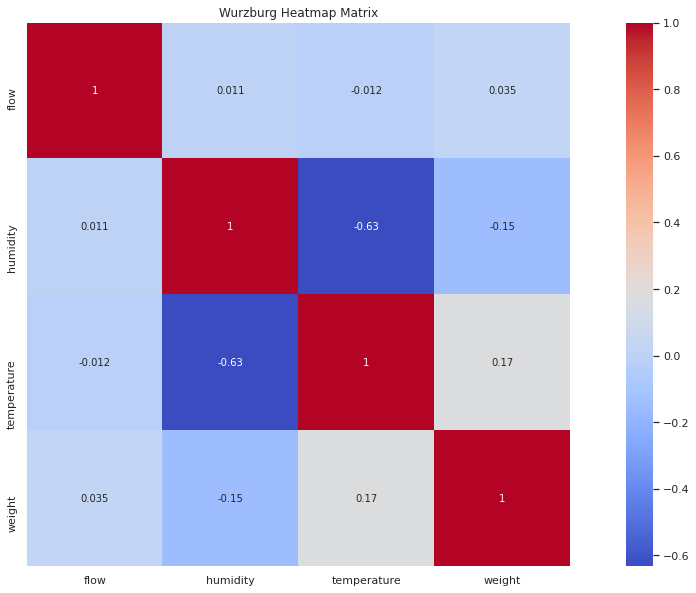

In [56]:
#shows correlation matrix and gets rid of the columns that are not suited for the correlation
corr_matrix = df_wur.corr(method='pearson') 
plt.figure(figsize=(20,10))
plt.title("Wurzburg Heatmap Matrix")
sns.heatmap(corr_matrix,vmax=1,square=True,annot=True,cmap='coolwarm')